# Sieć neuronowa wielowarstwowa jednokierunkowa (perceptron)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Liczba neuronów w kolejnych warstwach: wejściowej, ukrytej i wyjściowej

In [2]:
n_in=2
n_hid=20
n_out=1

Wzorce uczące będą miały postać wektorów o długości *n_in+n_out*

## Stany neuronów
W warstwie wejściowej i ukrytej umieszczamy dodatkowy neuron (tzw. bias), który **zawsze** jest aktywny.
Bias zastępuje próg aktywacji neuronu

In [3]:
S_in=zeros(n_in+1)
S_hid=zeros(n_hid)
S_out=zeros(n_out)

S_in[-1]=1

Średnie pole działające neurony w warstwach ukrytej i wyjściowej od neuronów z warstwy poprzedniej

In [4]:
h_hid=zeros(n_hid)
h_out=zeros(n_out)

## Wagi połączeń
### ... i ich różniczki (delty)
Przeważnie początkowym wagom przypisuje się liczby losowe bliskie zera.

Delty potrzebujemy do algorytmu wstecznej propagacji

In [5]:
W_ih=2*rand(n_in+1,n_hid)-1
W_ho=2*rand(n_hid,n_out)-1
dW_ih=zeros((n_in+1,n_hid))
dW_ho=zeros((n_hid,n_out))

## Funkcja aktywacji wraz z pochodną
wykorzystujemy funkcję sigmoidalną

In [6]:
def f(x):
    return 1/(1+exp(-x))

def Df(x):
    y=f(x)
    return y*(1-y)

## Karmimy sieć
... czyli przekazujemy do warstwy wejściowej wzorzec *inp*

In [7]:
def feed(inp):
    S_in[:n_in]=inp

### Dynamika sieci
propagacja następuje od warstwy wejściowej, poprzez ukrytą, do wyjściowej

In [8]:
def forward():
    global h_hid, S_hid, h_out, S_out
    h_hid=S_in @ W_ih
    S_hid=f(h_hid)
    h_out=S_hid @ W_ho
    S_out=f(h_out)

## .. i wszystko razem:

In [9]:
def eval(inp):
    feed(inp)
    forward()
    return S_out

## Liczymy różnicę między uzyskanym a oczekiwanym wyjściem

In [10]:
def diff(p):
    return pat[p,n_in:]-S_out

def error(p):
    return sum(diff(p)**2)/2

## Testujemy działanie sieci
Funkcja logiczna XOR (alternatywa rozłączna) to najprostszy przykład problemu liniowo nieseparowalnego

In [11]:
# XOR
# wzorce postaci [in_1, in_2, out_1]
pat=array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

## Uczenie sieci metodą wstecznej propagacji błędów
parametr *eta* to szybkość uczenia

In [12]:
eta=0.5
epoch=0
Er=1
error_history=[]
p_num=pat.shape[0] # liczba wektorów uczących

while (Er>0.001 and epoch<1000):
    Er=0
    dW_ih.fill(0)
    dW_ho.fill(0)
    for p in range(p_num):
        feed(pat[p,:n_in])
        forward()
        
        delta_out=Df(h_out)*diff(p)
        dW_ho+=outer(S_hid,delta_out)
        delta_hid=Df(h_hid)*(W_ho@delta_out)
        dW_ih+=outer(S_in,delta_hid)
        
        Er+=error(p)

    W_ih+=eta*dW_ih
    W_ho+=eta*dW_ho
    epoch+=1
    error_history.append(Er)
    
print("epoka: {}, błąd: {}".format(epoch, Er))

epoka: 1000, błąd: 0.007633774827101737


outer()

https://pl.wikipedia.org/wiki/Iloczyn_diadyczny

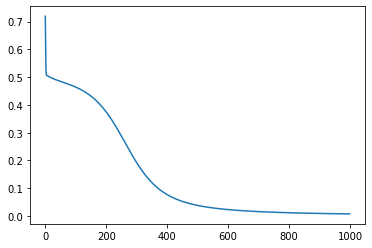

In [13]:
plot(error_history)

## Przestrzeń stanów
... wraz z zaznaczonymi kolorami klasami

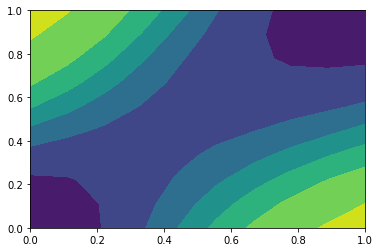

In [14]:
n=10 # rozdzielczość
z=zeros((n,n))
x=linspace(0,1,n)
for i in range(n):
    for j in range(n):
        z[i,j]=eval([x[j],x[i]])
contourf(x,x,z);

In [15]:
[eval(p[:n_in])[0] for p in pat]

[0.05063114629829578,
 0.9356123953603955,
 0.9395687393931538,
 0.06984054071867521]